# Lab 4 - Linear models

We focus on models in the form 

$$ y \sim \mathrm{Normal}(\alpha+X\beta,\sigma) $$



In [690]:
from cmdstanpy import CmdStanModel
import arviz as az
import numpy as np
import scipy.stats as stats
import scipy.stats as norm
import matplotlib.pyplot as plt
import pandas as pd

## Excercise 1 - modelling height of !Kung people

### Normal model - no predictors
We will try to fit $\mathrm{Normal}(\mu,\sigma)$ distribution to height data. Special case of linear model with $\beta=0$.

In [691]:
_BASE_URL = "https://raw.githubusercontent.com/rmcelreath/rethinking/Experimental/data"
HOWELL_DATASET_PATH = f"{_BASE_URL}/Howell1.csv"
d = pd.read_csv(HOWELL_DATASET_PATH, sep=';', header=0)
d=d[d.age>=18] #just adults 
d.head()


,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


## Task 1. Prior predictive checks

In [692]:
model_ppc=CmdStanModel(stan_file='height_1_ppc.stan')

R = 1000
sim=model_ppc.sample(iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=29042020,refresh=R)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.



1. Plot histograms of mu, sigma and simulated height.
2. Plot a joint distribution of mu and sigma.
3. Check if samples are consistent with priors.
4. Correct prior parameters to make them reasonably spreaded out. 
5. Check if observed data is possible to obtain using priors.

1. Plot histograms of mu, sigma and simulated height.

,lp__,accept_stat__,mu,sigma,height
0,0.0,0.0,220.623,8.126140,206.427
1,0.0,0.0,187.980,70.331700,297.105
2,0.0,0.0,174.566,11.778900,182.293
3,0.0,0.0,183.451,19.518000,218.821
4,0.0,0.0,160.795,4.678490,168.163
...,...,...,...,...,...
995,0.0,0.0,180.528,0.038448,180.516
996,0.0,0.0,175.565,5.345250,175.420
997,0.0,0.0,187.817,12.742400,182.643
998,0.0,0.0,162.099,4.810070,159.038


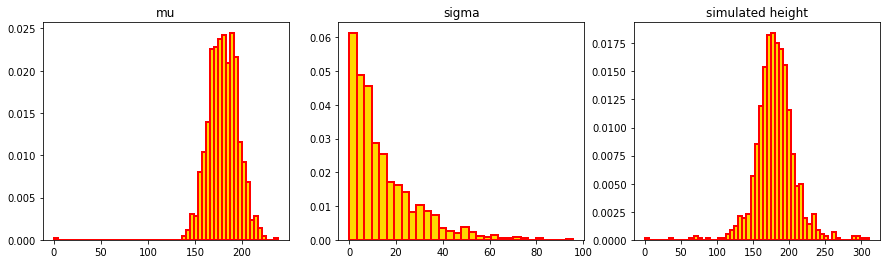

In [693]:
df = sim.draws_pd()
display(df)
mu_sim = df['mu']
sigma_sim = df['sigma']
height_sim = df['height']

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes[0].hist(mu_sim, bins='auto', density=True, color = 'gold', edgecolor='red',linewidth=2)
axes[0].set_title('mu')
axes[1].hist(sigma_sim, bins='auto', density=True, color = 'gold', edgecolor='red',linewidth=2)
axes[1].set_title('sigma')
axes[2].hist(height_sim, bins='auto', density=True, color = 'gold', edgecolor='red',linewidth=2)
axes[2].set_title('simulated height')
plt.show()

2. Plot a joint distribution of mu and sigma.

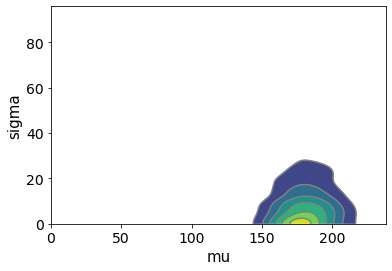

In [694]:
## 2. Plot a joint distribution of mu and sigma.
data = az.convert_to_dataset({'mu': mu_sim, 'sigma': sigma_sim}) # create an instance of the `InferenceData` object
az.plot_pair(data, kind='kde')
plt.show()

3. Check if samples are consistent with priors.

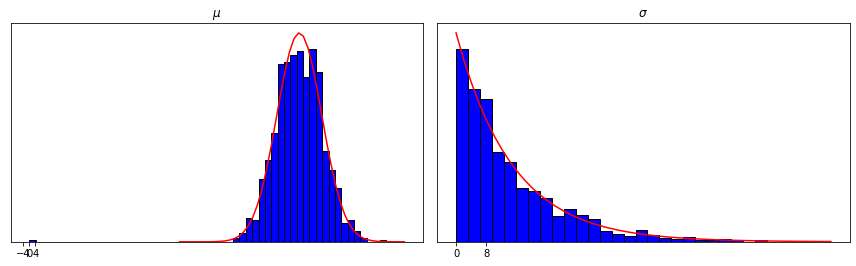

In [695]:
mu_sim=sim.stan_variable('mu')
sigma_sim=sim.stan_variable('sigma')
height_sim=sim.stan_variable('height')

fig = plt.figure(figsize=(12, 7))
gs = fig.add_gridspec(2,2)

ax2 = fig.add_subplot(gs [0, 0]) 
ax3= fig.add_subplot(gs [0, 1])
ax2.set_yticks([])
ax2.hist(mu_sim, bins='auto', color='blue', edgecolor='black',density='True')
x=np.linspace(100,250)
y=stats.norm.pdf (x, loc=180, scale=15)
ax2.plot(x,y, 'red')

ax2.set_title('$\mu$')
ax3.set_yticks([])
ax2.set_yticks([])
ax3.hist(sigma_sim, bins='auto', color='blue', edgecolor='black',density='True')

x=np.linspace (0,100)
y=stats.expon.pdf (x, scale=15) 
ax3.plot(x,y,color='red')
ax3.set_title('$\sigma$')
ax1.annotate(text='272 cm (World record)', xy=(72,0.01))

fig.tight_layout()
plt.show()

4. Correct prior parameters to make them reasonably spreaded out.

5. Check if observed data is possible to obtain using priors.

## Task 2. Model fit and evaluation

In [696]:
model_1_fit=CmdStanModel(stan_file='height_1_fit.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [697]:
fit=model_1_fit.sample(data=dict(N=len(d),
                                   heights=d.height.values),
                         seed=28052020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |████████▏ | 00:00 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.



1. Plot a joint distribution of fitted mu and sigma.
2. Plot histograms of data and simulated heights and evaluate the quality of model.



1. Plot a joint distribution of fitted mu and sigma.

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,mu,sigma,height
0,-896.261,0.986028,1.079740,2.0,3.0,0.0,896.632,154.532,7.48436,160.919
1,-898.553,0.449702,1.079740,2.0,3.0,0.0,900.377,153.655,7.82897,158.099
2,-896.546,0.978284,1.079740,2.0,3.0,0.0,898.586,154.937,7.49069,164.524
3,-896.487,0.984037,1.079740,2.0,3.0,0.0,897.028,154.321,8.00535,162.130
4,-896.339,0.936436,1.079740,2.0,3.0,0.0,897.298,154.208,7.77405,166.414
...,...,...,...,...,...,...,...,...,...,...
3995,-896.822,1.000000,0.830939,1.0,1.0,0.0,897.299,154.966,7.43142,150.654
3996,-898.921,0.789441,0.830939,2.0,3.0,0.0,899.689,155.312,8.33564,164.504
3997,-898.697,1.000000,0.830939,2.0,3.0,0.0,899.360,155.111,8.39920,158.757
3998,-896.255,1.000000,0.830939,2.0,3.0,0.0,898.577,154.757,7.49960,157.122


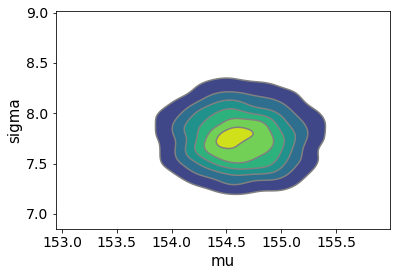

In [698]:
df = fit.draws_pd()
display(df)
mu = df['mu']
sigma = df['sigma']
height = df['height']

data = az.convert_to_dataset({'mu': mu, 'sigma': sigma}) # create an instance of the `InferenceData` object
az.plot_pair(data, kind='kde')
plt.show()

2. Plot histograms of data and simulated heights and evaluate the quality of model.

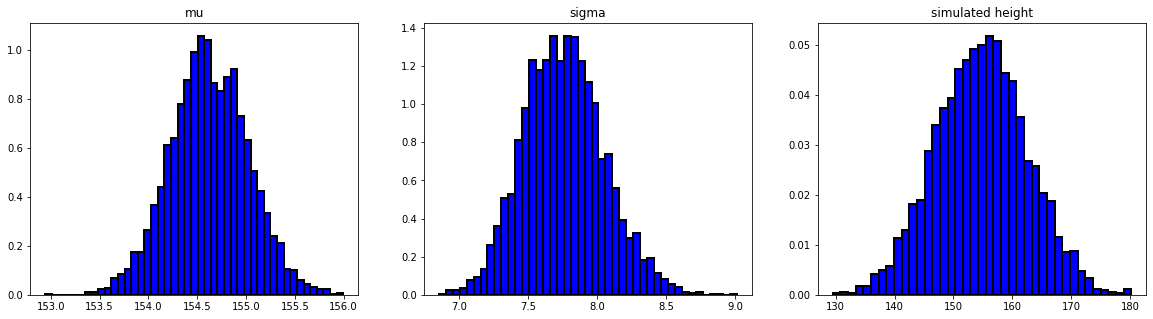

In [699]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
axes[0].hist(mu, bins='auto', density=True, color = 'blue', edgecolor='black',linewidth=2)
axes[0].set_title('mu')
axes[1].hist(sigma, bins='auto', density=True, color = 'blue', edgecolor='black',linewidth=2)
axes[1].set_title('sigma')
axes[2].hist(height, bins='auto', density=True, color = 'blue', edgecolor='black',linewidth=2)
axes[2].set_title('simulated height')
plt.show()

## Task 3. Adding predictor to the model - weight

Create column ```c_weight``` in the dataframe containing weights substrated by their mean.


In [700]:
d['c_weight']=d.weight-d.weight.mean()
d.head()

data_sim={'N':50, 'weight':np.linspace(d.c_weight.min(),d.c_weight.max())}

## Task 4. Prior predictive checks
 

In [701]:
model_ppc=CmdStanModel(stan_file='height_2a_ppc.stan')
R = 1000 
sim=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


1. Plot lines for each sampled slope beta and intercept alpha, verify if possible predicted heights are consistent with minimum (0) and maximum (check Wikipedia) heights observed in nature.

Text(55, 272, '272')

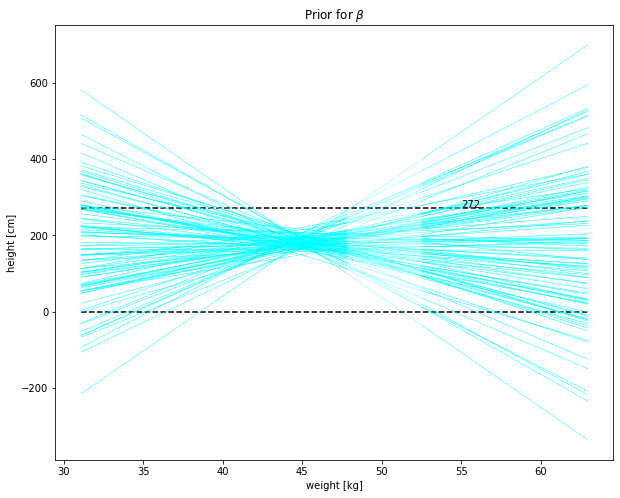

In [702]:
alpha_sim=sim.stan_variable('alpha')
beta_sim=sim.stan_variable('beta')

fig, axes = plt.subplots(1, 1, figsize=(10, 8))
axes.hlines([0,272], xmin=d.weight.min(), xmax=d.weight.max(), linestyle='--', color='black')
for i in range(100):
    axes.plot(d.weight, alpha_sim[i]+beta_sim[i]*d.c_weight, color= 'cyan', alpha=0.5, linewidth=0.5)
axes.set_xlabel('weight [kg]')
axes.set_ylabel('height [cm]')
axes.set_title(r'Prior for $\beta$')
axes.annotate(text='272', xy=(55,272))

## Task 5. Modifying prior

If prior for beta admits negative values, then it makes no sense. Lets change prior to lognormal distribution.


In [703]:
model_ppc=CmdStanModel(stan_file='height_2b_ppc.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [704]:
sim=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


1. Plot lines for each sampled slope beta and intercept alpha, verify if possible predicted heights are consistent with minimum (0) and maximum (check Wikipedia) heights observed in nature.


In [705]:
alpha_sim=sim.stan_variable('alpha')
beta_sim=sim.stan_variable('beta')

fig, axes = plt.subplots(1, 1, figsize=(10, 8))
axes.hlines([0,272], xmin=d.weight.min(), xmax=d.weight.max(), linestyle='--', color='black')
for i in range(100):
    axes.plot(d.weight, alpha_sim[i]+beta_sim[i]*d.c_weight, color= 'cyan', alpha=0.5, linewidth=0.5)
axes.set_xlabel('weight [kg]')
axes.set_ylabel('height [cm]')
axes.set_title(r'Lognormal prior for $\beta$')
axes.annotate(text='272', xy=(55,272))

2. For each simulated weight plot maximum, minimum, and 5, 25, 50, 75, 95 quantiles of simulated weight (all in the same plot). Compare with observed data. Is observed data possible within the prior model?

## Task 6. Fitting and evaluating model


In [ ]:
model_2_fit=CmdStanModel(stan_file='height_2_fit.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


1. Create ```data_fit``` dictionary containing data from  ```N``` first rows of dataframe


In [ ]:
d_short=d.head(100)

data_fit=dict(N=len(d_short),
              weight=d_short.c_weight.values,
              heights=d_short.height.values)

fit=model_2_fit.sample(data=data_fit,seed=28052020)

alpha_fit=fit.stan_variable('alpha')
beta_fit=fit.stan_variable('beta')
mu_fit=fit.stan_variable('mu')
height_pred=fit.stan_variable('height')

az.summary(fit,var_names=['alpha','beta','sigma'],round_to=2,kind='stats')

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


,mean,sd,hdi_3%,hdi_97%
alpha,154.04,0.55,153.03,155.13
beta,0.96,0.08,0.81,1.12
sigma,5.53,0.41,4.82,6.32


2. Plot lines for each sampled slope beta and intercept alpha. Verify how uncertainity changes with increasing of sample (N)

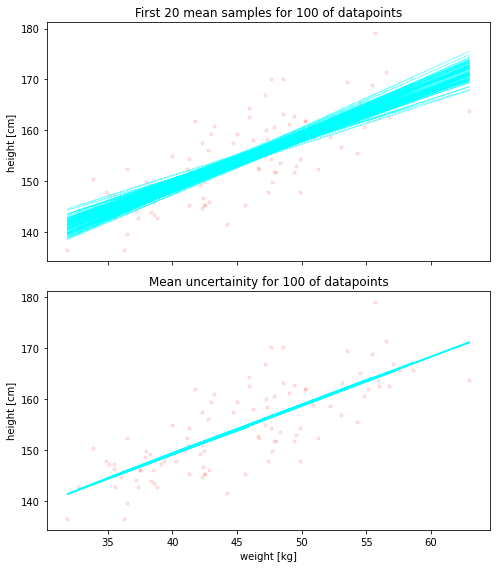

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(7, 8), sharey=True, sharex=True)

# Plot lines for each sampled slope beta and intercept alpha
ax0 = axes[0]
for i in range(100):
    ax0.plot(d_short.weight,
             alpha_fit[i] + beta_fit[i] * d_short.c_weight,
             color='cyan',
             alpha=0.5,
             linewidth=0.5)
ax0.scatter(d_short.weight, d_short.height, color='red', alpha=0.1, s=10)
ax0.set_ylabel('height [cm]')
ax0.set_title('First 20 mean samples for {} of datapoints'.format(len(d_short)))

# Plot mean with shaded error band
ax1 = axes[1]
mean_height = np.mean(height_pred, axis=0)
std_height = np.std(height_pred, axis=0)
ax1.plot(d_short.weight, mean_height, color='cyan')
# ax1.fill_between(d_short.weight,
#                   mean_height - std_height,
#                   mean_height + std_height,
#                   alpha=0.2,
#                   color='cyan')
ax1.scatter(d_short.weight, d_short.height, color='red', alpha=0.1, s=10)
ax1.set_xlabel('weight [kg]')
ax1.set_ylabel('height [cm]')
ax1.set_title('Mean uncertainity for {} of datapoints'.format(len(d_short)))

fig.tight_layout()
plt.show()


3. For each value of weight plot mean simulated height along with errorbar of one standard deviation (use ```errorbar``` from matplotlib). Compare with observed data (N points). Is observed data possible within the posterior model? What changes when N increases.


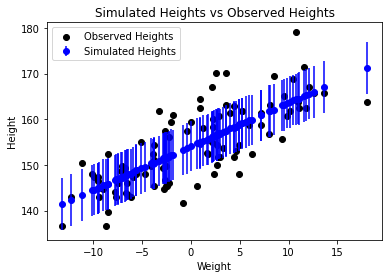

In [ ]:
# Get mean heights and standard deviations
mean_heights = np.mean(height_pred, axis=0)
std_heights = np.std(height_pred, axis=0)

# Plot mean heights with error bars and label as 'Simulated Heights'
plt.errorbar(d_short.c_weight, mean_heights, yerr=std_heights, fmt='o', color='blue', label='Simulated Heights')

# Plot observed heights and label as 'Observed Heights'
plt.scatter(d_short.c_weight, d_short.height, color='black', label='Observed Heights')

# Add legend, labels, and title
plt.legend()
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Simulated Heights vs Observed Heights')
plt.show()

# To check if the observed data is possible within the posterior model, you can visually compare the two plots.
# If the observed data points fall within the range of the error bars of the mean simulated height at their corresponding weight values, 
# then the observed data is possible within the posterior model. If not, then the model may not be a good fit for the data.

# When N increases, the error bars may become smaller as the sample size increases, 
# indicating a more precise estimate of the mean simulated height at each weight value. However, 
# the overall shape of the plot and the comparison with the observed data should remain the same.


## Task 7. Extending the model

1. Center the weight data (substract mean vaule of weight from all values). Test how model works for such data. What is the interpretation of $\alpha$ in such case?
2. Using centered data modify your model with a second power of weight, select prior for its coefficient using prior predictive checks and after fitting check if model is still good.
3. Try to vectorize the model to avoid necessity of a for loop in the ```model``` block. 